# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Remove any rows with column value equals to "unknown"
mask = (df.astype(str) == "unknown").any(axis=1)
df = df[~mask]

/tmp/ipython-input-2548016875.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=45)
/tmp/ipython-input-2548016875.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=45)
/tmp/ipython-input-2548016875.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=45)
/tmp/ipython-input-2548016875.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=45)
/tmp/ipython-input-254801687

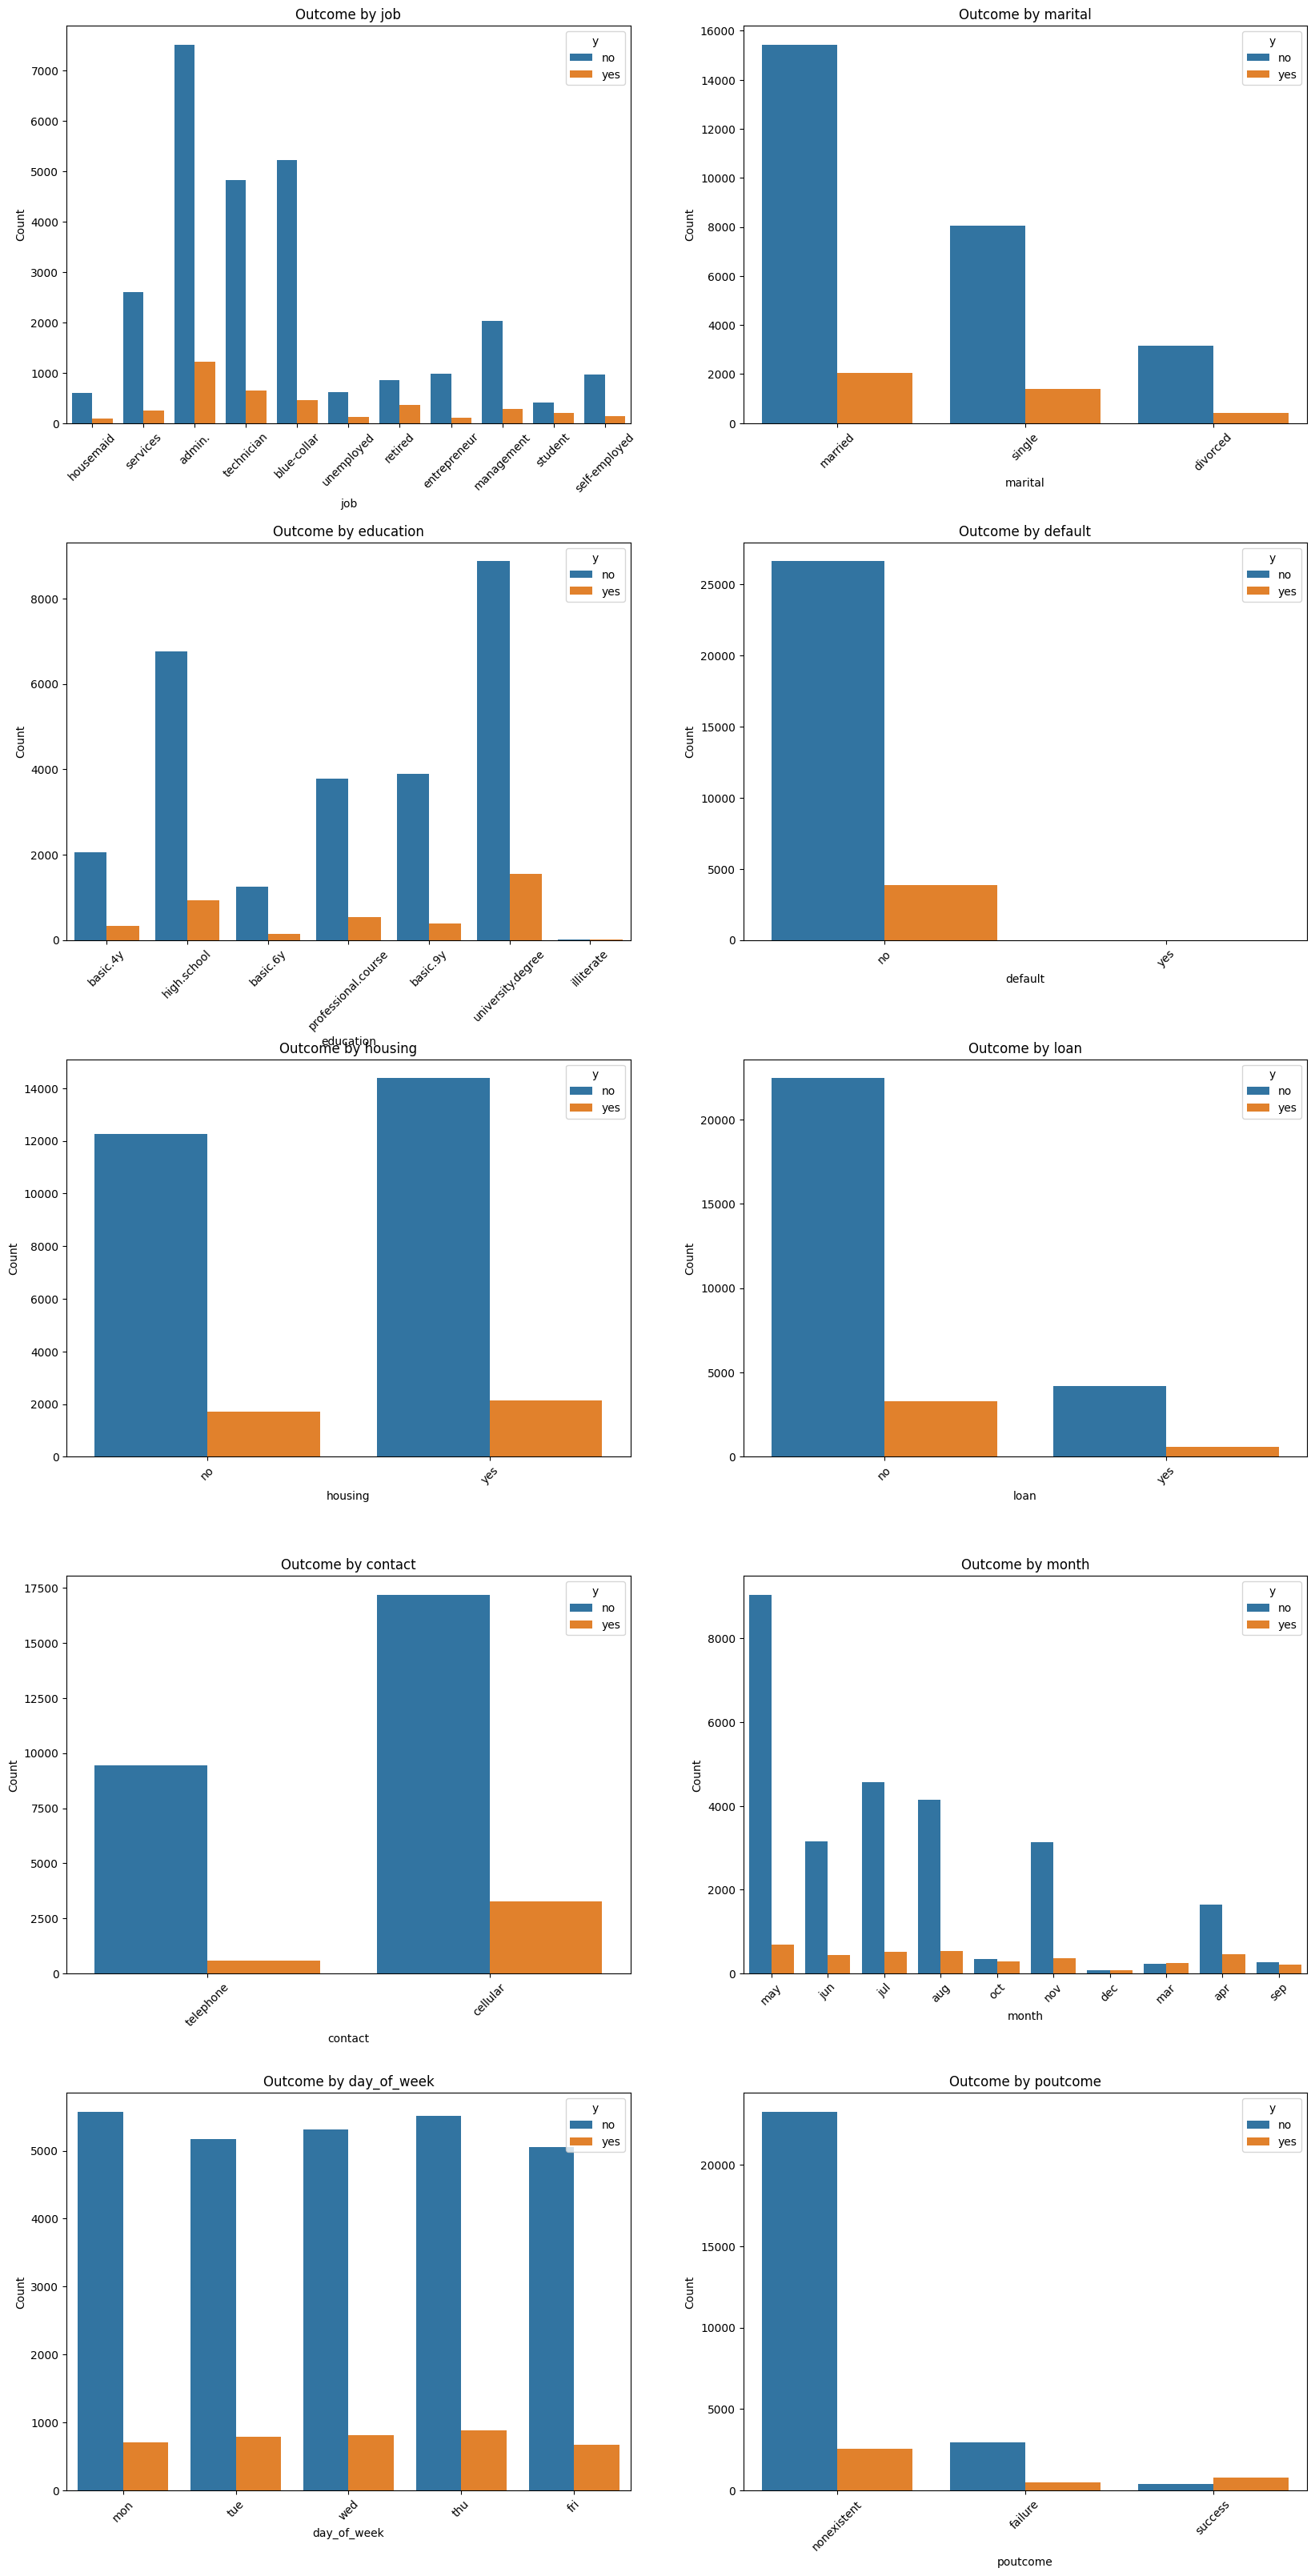

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cat_cols = df.select_dtypes(include='object').columns.tolist()

figure, ax = plt.subplots(len(df_cat_cols)// 2, 2, figsize=(20, 40))

for i, col in enumerate(df_cat_cols):
  if col == 'y':
    continue
  sns.countplot(x=col, hue='y', data=df, ax=ax[i//2, i%2])
  ax[i//2, i%2].set_title(f"Outcome by {col}")
  ax[i//2, i%2].set_xlabel(col)
  ax[i//2, i%2].set_ylabel('Count')
  ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=45)
plt.subplots_adjust(hspace=0.3)
plt.show()

From the above plots, it seems that the `martical status` does not influence the outcome since the ration between the number of customers who subscribe to the number of customers who did not subscibe are relatively the same among married, single and divorce.  Similar observation for `day_of_week`.  The number of customers subscribe vs the number of customers did not subscribe are relatively the same regardless the day of the week.

In [ ]:
df_num_cols = df.select_dtypes(include='number').columns.tolist()

figure, ax = plt.subplots(len(df_num_cols)// 2, 2, figsize=(20, 40))

for i, col in enumerate(df_cat_cols):
  if col == 'y':
    continue
  sns.countplot(x=col, hue='y', data=df, ax=ax[i//2, i%2])
  ax[i//2, i%2].set_title(f"Outcome by {col}")
  ax[i//2, i%2].set_xlabel(col)
  ax[i//2, i%2].set_ylabel('Count')
  ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=45)
plt.subplots_adjust(hspace=0.3)
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null  floa

In [6]:
# The goals are to determine the most effective campaign and
# what customers factors can correctly predict the outcome of
# the campaign.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [43]:
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

X = df.drop(columns = ['day_of_week', 'y'])
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

X_cat_cols = X.select_dtypes(include='object').columns.tolist()
X_num_cols = X.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('target_encoder', TargetEncoder(random_state=42), X_cat_cols),
        ('scaler', StandardScaler(), X_num_cols)
    ],
    remainder='passthrough' # Keep other columns if any
)

X_transform = preprocessor.fit_transform(X, y)
X = pd.DataFrame(X_transform, columns=X.columns)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [45]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_baseline = dummy_clf.predict(X_test)

# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Classification Accuracy (most frequent): {accuracy_baseline:.4f}")

Baseline Classification Accuracy (most frequent): 0.8729


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [10]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(max_iter=1000, random_state=42)
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Problem 9: Score the Model

What is the accuracy of your model?

In [11]:
print(f"Logistic Regression Accuracy Score: {lgr.score(X_test, y_test)}")

Logistic Regression Accuracy Score: 0.8979270532668591


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [12]:
import time

def withTimeMs(func) -> float:
  start = time.time()
  func
  end = time.time()
  return round(((end-start) * 1000000), 3)

def roundScore(score: float) -> float:
  return round(score, 3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

lgr = LogisticRegression()
lgr_time = withTimeMs(lgr.fit(X_train, y_train))
lgr_test_score = roundScore(lgr.score(X_test, y_test))
lgr_train_score = accuracy_score(y_train, lgr.predict(X_train))
print(f"lgr_time: {lgr_time}, lgr_train_score: {lgr_train_score}, lgr_test_score: {lgr_test_score}")

knn = KNeighborsClassifier()
knn_time = withTimeMs(knn.fit(X_train, y_train))
knn_train_score = roundScore(accuracy_score(y_train, knn.predict(X_train)))
knn_test_score = roundScore(knn.score(X_test, y_test))
print(f"knn_time: {knn_time}, knn_train_score: {knn_train_score}, knn_test_score: {knn_test_score}")

dt = DecisionTreeClassifier()
dt_time = withTimeMs(dt.fit(X_train, y_train))
dt_train_score = roundScore(accuracy_score(y_train, dt.predict(X_train)))
dt_test_score = roundScore(dt.score(X_test, y_test))
print(f"dt_time: {dt_time}, dt_train_score: {dt_train_score}, dt_test_score: {dt_test_score}")

svm = SVC()
svm_time = withTimeMs(svm.fit(X_train, y_train))
svm_train_score = roundScore(accuracy_score(y_train, svm.predict(X_train)))
svm_test_score = roundScore(svm.score(X_test, y_test))
print(f"svm_time: {svm_time}, svm_train_score: {svm_train_score}, svm_test_score: {svm_test_score}")

models = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
                       'Train Time': [lgr_time, knn_time, dt_time, svm_time],
                       'Train Accuracy': [lgr_train_score, knn_train_score, dt_train_score, svm_train_score],
                       'Test Accuracy': [lgr_test_score, knn_test_score, dt_test_score, svm_test_score]
                      })
models

lgr_time: 1.431, lgr_train_score: 0.899195311816671, lgr_test_score: 0.898
knn_time: 1.431, knn_train_score: 0.925, knn_test_score: 0.892
dt_time: 1.192, dt_train_score: 1.0, dt_test_score: 0.874
svm_time: 0.715, svm_train_score: 0.905, svm_test_score: 0.897


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,1.431,0.899195,0.898
1,KNN,1.431,0.925000,0.892
2,Decision Tree,1.192,1.000000,0.874
3,SVM,0.715,0.905000,0.897


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [14]:
from sklearn.model_selection import GridSearchCV

knn_params = {
    'n_neighbors': [10, 25, 30]
}

knn_finder = GridSearchCV(knn, knn_params, cv=5)
knn_time = withTimeMs(knn_finder.fit(X_train, y_train))
knn_finder.best_params_
print(f"knn best params: {knn_finder.best_params_}")

knn_train_score = roundScore(accuracy_score(y_train, knn_finder.predict(X_train)))
knn_test_score = roundScore(knn_finder.score(X_test, y_test))
print(f"knn_time: {knn_time}, knn_train_score: {knn_train_score}, knn_test_score: {knn_test_score}")


knn best params: {'n_neighbors': 25}
knn_time: 1.431, knn_train_score: 0.907, knn_test_score: 0.901


In [15]:
dt_params = {
    'max_depth': [None, 5, 10, 15]
}

dt_finder = GridSearchCV(dt, dt_params, cv=5)
dt_time = withTimeMs(dt_finder.fit(X_train, y_train))
dt_finder.best_params_
print(f"dt best params: {dt_finder.best_params_}")

dt_train_score = roundScore(accuracy_score(y_train, dt_finder.predict(X_train)))
dt_test_score = roundScore(dt_finder.score(X_test, y_test))
print(f"dt_time: {dt_time}, dt_train_score: {dt_train_score}, dt_test_score: {dt_test_score}")


dt best params: {'max_depth': 5}
dt_time: 1.192, dt_train_score: 0.91, dt_test_score: 0.904


In [19]:
lg_params = {
    'C': [0.5, 1.0, 1.5],
}

lg_finder = GridSearchCV(lgr, lg_params, cv=5)
lg_time = withTimeMs(lg_finder.fit(X_train, y_train))
lg_finder.best_params_
print(f"lg best params: {lg_finder.best_params_}")

lg_train_score = roundScore(accuracy_score(y_train, lg_finder.predict(X_train)))
lg_test_score = roundScore(lg_finder.score(X_test, y_test))
print(f"lg_time: {lg_time}, lg_train_score: {lg_train_score}, lg_test_score: {lg_test_score}")

lg best params: {'C': 1.0}
lg_time: 0.238, lg_train_score: 0.899, lg_test_score: 0.898


##### Questions